# SIR Solución por elementos finitos

En este trabajo la propuesta es resolver ecuaciones diferenciales por elementos finitos

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [49]:
No = 1
Io = 0.0001
So = No - Io
Ro = 0
ro = 0
Dias = 160

In [88]:
Duracion = 14.0 # Duracion media de la enfermedad
Tasa     = 1.2 # Tasa diaria de interaccion       
Contagio = 15.0/100 # Probabilidad de contagio
Recupero = 95.0/100 # Tasa de recuperación
NoRecupe = 1 - Recupero # 5.0/100 # Tasa de mortalidad
beta  = Contagio * Tasa
gamma = Recupero / Duracion
mu    = NoRecupe / Duracion

In [89]:
t = np.linspace(0, Dias, Dias)

In [90]:
S = np.zeros(Dias)
I = np.zeros(Dias)
R = np.zeros(Dias)
r = np.zeros(Dias)
b = np.zeros(Dias)  
g = np.zeros(Dias)
m = np.zeros(Dias)

In [91]:
No = 100
S[0] = 99
I[0] = 1
R[0] = 0
r[0] = 0

In [92]:
for i in range(1, Dias):
    j = i-1
    NT = int(S[j]+I[j]+R[j]+r[j]) # poblacion total
    
    Cc = beta * S[j] * I[j] / NT  # numero diaria de Contagios
    Rc = gamma * I[j]             # numero diario de Recuperados
    rc = mu * I[j]                # numero diario de retirados
   
    S[i] = S[j] - Cc
    I[i] = I[j] + Cc - Rc - rc
    R[i] = R[j] + Rc
    r[i] = r[j] + rc

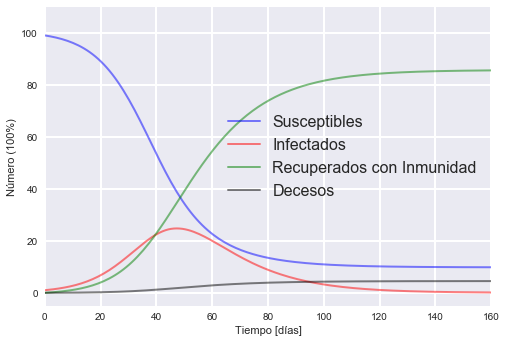

In [94]:
#Grafica los datos en tres curvas separadas para S(t), I(t) y R(t)
with plt.style.context('seaborn'):
    plt.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptibles')
    plt.plot(t, I, 'r', alpha=0.5, lw=2, label='Infectados')
    plt.plot(t, R, 'g', alpha=0.5, lw=2, label='Recuperados con Inmunidad')
    plt.plot(t, r, 'k', alpha=0.5, lw=2, label='Decesos')
    plt.xlabel('Tiempo [días]')
    plt.ylabel('Número ('+str(NT)+'%)')
    plt.ylim(-NT/20,NT*1.1) #/ 30
    plt.xlim(0, Dias)
    plt.grid(b=True, which='major', c='w', lw=2, ls='-')
    plt.legend(loc= 'best', prop={'size': 16})
    plt.show()